In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import csv
import statsmodels as sm


## import the Genchart data and split it based on the fuel type 


In [2]:
#read the CSV and create a variable with the dataname = name of choice 
def csv_reader(filepath, dataname):
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    
    globals()[dataname] = data

# take a variable and clean the data
def chart_to_dataframe(data_name, data):
    df_name = 'df_' + data_name
    globals()[df_name] = pd.DataFrame(data[1:], columns=data[0])
    
    if 'Date_MST' in globals()[df_name].columns:
        date_column = 'Date_MST'
    else:
        date_column = '\ufeffDate_MST'
    
    globals()[df_name][date_column] = pd.to_datetime(globals()[df_name][date_column]).dt.date
    globals()[df_name]['Measure_Values'] = pd.to_numeric(globals()[df_name]['Measure_Values'], errors='coerce').astype(float)
    
    return globals()[df_name]

In [3]:
path_genchart = r'C:\Users\amer_\Documents\GitHub\Energy_Consumption\Data\Gen Chart_data.csv' #change based on your file path
#retrieve Gen Chart_data into python as genchart_data 
csv_reader(path_genchart, 'genchart_data')
#retrieve genchart_data and make it as dataframe 
df_genchart_data = chart_to_dataframe('genchart_data', genchart_data)

## create separate dataframes for each type of energy

In [4]:
#fix small problem with the naming of Fuel_Type column 
df_genchart_data.rename(columns={'\ufeffFuel_Type': 'Fuel_Type'}, inplace=True)

#group Fueltype
grouped_data = df_genchart_data.groupby('Fuel_Type')

# Create a dictionary to store the separate groups
fuel_type_dataframes = {}

# Iterate over each group and create separate DataFrames
for fuel_type, group in grouped_data:
    fuel_type_dataframes[fuel_type] = group.copy().reset_index(drop=True)

#create a dataframe for each fueltype 
Coal_dataframe = fuel_type_dataframes['Coal']
Cogeneration_dataframe = fuel_type_dataframes['Cogeneration']
Combined_Cycle_dataframe = fuel_type_dataframes['Combined Cycle']
Dual_Fuel_dataframe = fuel_type_dataframes['Dual Fuel']
Gas_Fired_Steam_dataframe = fuel_type_dataframes['Gas Fired Steam']
Hydro_dataframe = fuel_type_dataframes['Hydro']#renewable
Other_dataframe = fuel_type_dataframes['Other']
Simple_Cycle_dataframe = fuel_type_dataframes['Simple Cycle']
Solar_dataframe = fuel_type_dataframes['Solar']#renewable
Storage_dataframe = fuel_type_dataframes['Storage']
Wind_dataframe = fuel_type_dataframes['Wind']#renewable



## create 4 dataframes with the following classifications:
- renewable prior 2019
- renewable after 2019
- non-renewable prior 2019
- non-renewable after 2019

In [5]:
renewable_prior_2019 = pd.concat([Hydro_dataframe, Solar_dataframe, Wind_dataframe])
#filter the data for date before 2019 and Measure_Names is Maximum Capacity
renewable_prior_2019 = renewable_prior_2019[(renewable_prior_2019['Date_MST'] < pd.to_datetime('2019-01-01')) &
                                            (renewable_prior_2019['Measure_Names'] == 'Maximum Capacity')]

renewable_after_2019 = pd.concat([Hydro_dataframe, Solar_dataframe, Wind_dataframe])
#filter the data for date after 2019 and Measure_Names is Maximum Capacity

renewable_after_2019 = renewable_after_2019[(renewable_after_2019['Date_MST'] >= pd.to_datetime('2019-01-01')) &
                                            (renewable_after_2019['Measure_Names'] == 'Maximum Capacity')]


non_renewable_prior_2019 = pd.concat([Coal_dataframe, 
                                      Cogeneration_dataframe,
                                      Combined_Cycle_dataframe,
                                      Dual_Fuel_dataframe,
                                      Gas_Fired_Steam_dataframe,
                                      Simple_Cycle_dataframe,
                                      ])
#filter the data for date before 2019 and Measure_Names is Maximum Capacity
non_renewable_prior_2019 = non_renewable_prior_2019[(non_renewable_prior_2019['Date_MST'] < pd.to_datetime('2019-01-01')) &
                                                    (non_renewable_prior_2019['Measure_Names'] == 'Maximum Capacity')]


non_renewable_after_2019 = pd.concat([Coal_dataframe, 
                                      Cogeneration_dataframe,
                                      Combined_Cycle_dataframe,
                                      Dual_Fuel_dataframe,
                                      Gas_Fired_Steam_dataframe,
                                      Simple_Cycle_dataframe,
                                      ])
#filter the data for date after 2019 and Measure_Names is Maximum Capacity
non_renewable_after_2019 = non_renewable_after_2019[(non_renewable_after_2019['Date_MST'] >= pd.to_datetime('2019-01-01')) &
                                                    (non_renewable_after_2019['Measure_Names'] == 'Maximum Capacity')]


C:\Users\amer_\AppData\Local\Temp\ipykernel_15560\2777672881.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  renewable_prior_2019 = renewable_prior_2019[(renewable_prior_2019['Date_MST'] < pd.to_datetime('2019-01-01')) &
C:\Users\amer_\AppData\Local\Temp\ipykernel_15560\2777672881.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  renewable_after_2019 = renewable_after_2019[(renewable_after_2019['Date_MST'] >= pd.to_datetime('2019-01-01')) &
C:\Users\amer_\AppData\Local\Temp\ipykernel_15560\2777672881.py:17: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in orde

## Create Visuals for each fueltype over time 

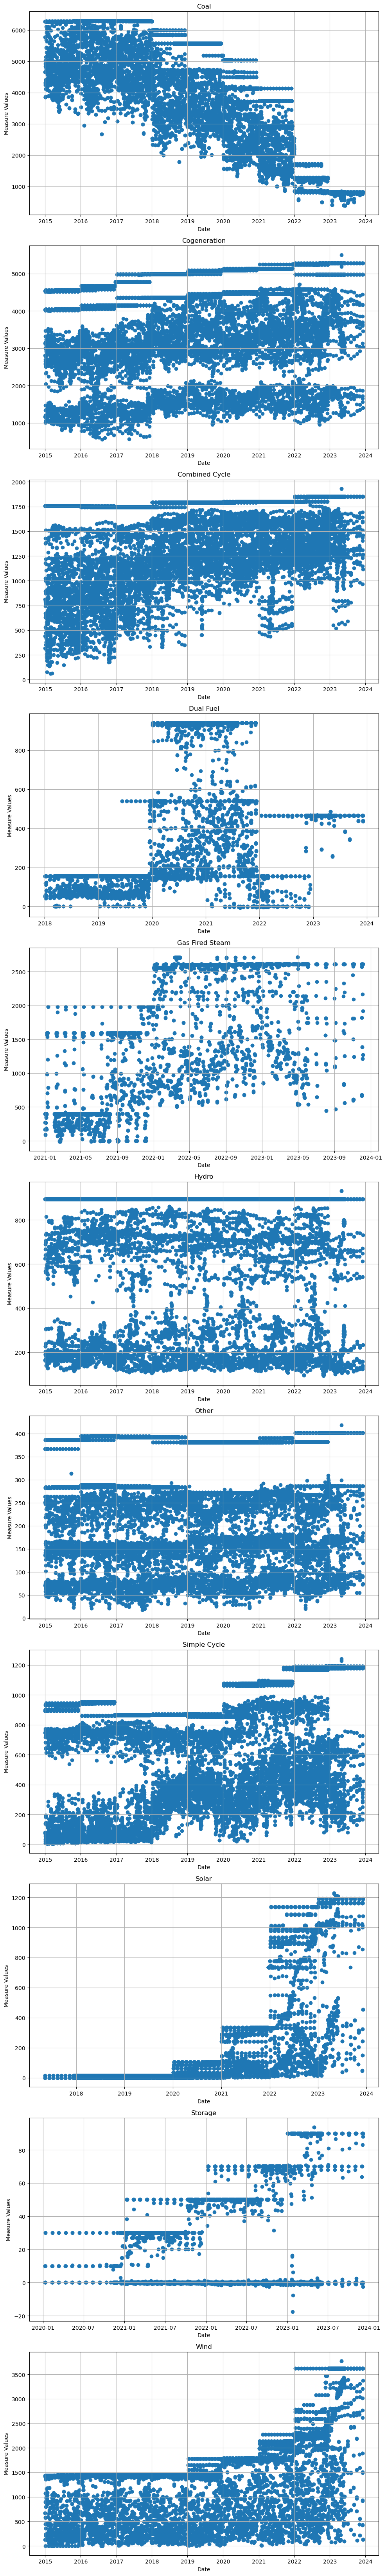

In [6]:
fig, axes = plt.subplots(len(fuel_type_dataframes), 1, figsize=(10, 6 * len(fuel_type_dataframes)))

# Iterate over fuel types and create scatterplot for each one
for i, (fuel_type, dataframe) in enumerate(fuel_type_dataframes.items()):
    ax = axes[i] if len(fuel_type_dataframes) > 1 else axes  # Handle single subplot case
    ax.scatter(dataframe['Date_MST'], dataframe['Measure_Values'])
    ax.set_title(fuel_type)
    ax.set_xlabel('Date')
    ax.set_ylabel('Measure Values')
    ax.grid(True)

plt.tight_layout()
plt.show()

## statistics test 

In [7]:
#trying to test mean
renewable_prior_2019_mean = renewable_prior_2019['Measure_Values'].mean()
renewable_after_2019_mean = renewable_after_2019['Measure_Values'].mean()

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(renewable_prior_2019_mean, renewable_after_2019_mean)
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  nan
P-Value:  nan


C:\Users\amer_\AppData\Local\Temp\ipykernel_15560\738601284.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(renewable_prior_2019_mean, renewable_after_2019_mean)
c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\amer_\.conda\envs\compass_env\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [8]:
# t-test statistics for the renewable energy source
t_stat, p_value = ttest_ind(renewable_prior_2019['Measure_Values'], renewable_after_2019['Measure_Values'])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  -6.665041224488532
P-Value:  2.8180265874468862e-11


In [9]:
# t-test statistics for the non-renewable energy source
t_stat, p_value = ttest_ind(non_renewable_prior_2019['Measure_Values'], non_renewable_after_2019['Measure_Values'])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)

T-statistic value:  25.315196654432484
P-Value:  1.8717813851945898e-138


In [10]:
#export the data for backup
filepath = 'C:/Users/amer_/Desktop/Backup/Energy_consumptionV2/Data' #change based on your path
renewable_after_2019.to_csv(filepath + '/renewable_after_2019.csv', index=False)
renewable_prior_2019.to_csv(filepath + '/renewable_prior_2019.csv', index=False)
non_renewable_after_2019.to_csv(filepath + '/non_renewable_after_2019.csv', index=False)
non_renewable_prior_2019.to_csv(filepath + '/non_renewable_prior_2019.csv', index=False)

## Visuals for all 4 datasets 


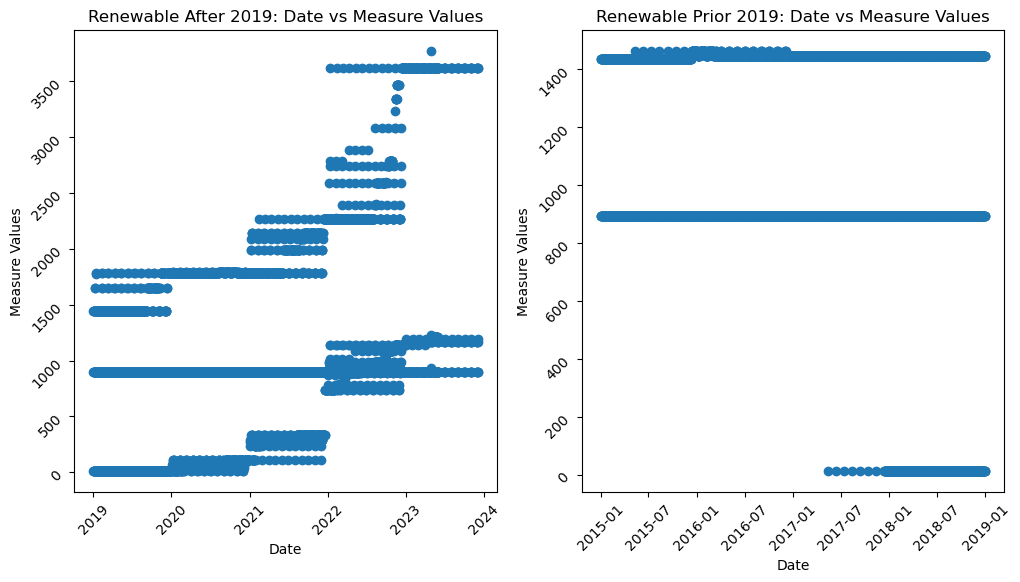

In [11]:
dates = renewable_prior_2019['Date_MST']
measure_values = renewable_prior_2019['Measure_Values']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#bring columns from the Dataframes 
dates_after_2019 = renewable_after_2019['Date_MST']
measure_values_after_2019 = renewable_after_2019['Measure_Values']

dates_prior_2019 = renewable_prior_2019['Date_MST']
measure_values_prior_2019 = renewable_prior_2019['Measure_Values']

# Scatter plot for renewable_after_2019
axes[0].scatter(dates_after_2019, measure_values_after_2019)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Measure Values')
axes[0].set_title('Renewable After 2019: Date vs Measure Values')
axes[0].tick_params(rotation=45)


# Scatter plot for renewable_prior_2019
axes[1].scatter(dates_prior_2019, measure_values_prior_2019)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Measure Values')
axes[1].set_title('Renewable Prior 2019: Date vs Measure Values')
axes[1].tick_params(rotation=45)

plt.show()

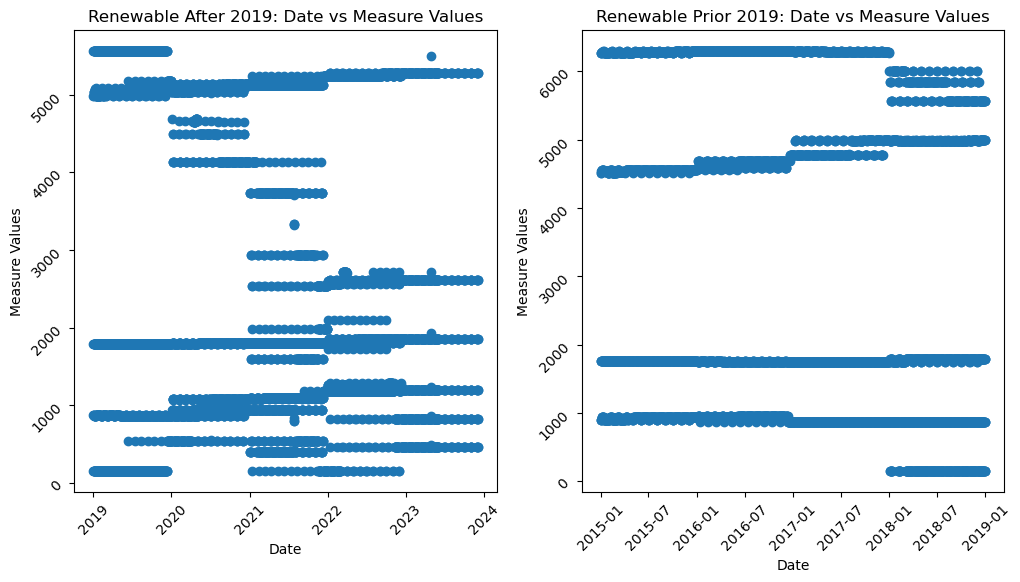

In [12]:
dates = non_renewable_prior_2019['Date_MST']
measure_values = non_renewable_prior_2019['Measure_Values']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#bring columns from the Dataframes 
dates_after_2019 = non_renewable_after_2019['Date_MST']
measure_values_after_2019 = non_renewable_after_2019['Measure_Values']

dates_prior_2019 = non_renewable_prior_2019['Date_MST']
measure_values_prior_2019 = non_renewable_prior_2019['Measure_Values']

# Scatter plot for renewable_after_2019
axes[0].scatter(dates_after_2019, measure_values_after_2019)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Measure Values')
axes[0].set_title('Renewable After 2019: Date vs Measure Values')
axes[0].tick_params(rotation=45)


# Scatter plot for renewable_prior_2019
axes[1].scatter(dates_prior_2019, measure_values_prior_2019)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Measure Values')
axes[1].set_title('Renewable Prior 2019: Date vs Measure Values')
axes[1].tick_params(rotation=45)

plt.show()